# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon #--no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 42.6 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080017 sha256=304db20fb837bb99cf784f9275fe10b47bc6a777afd31ecbf44098de5add06d1
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.3
    Uninstalling bokeh-3.4.3:
      Successfully uninstalled bokeh-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
holoviews 1.19.1 requires bokeh>=

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "sabaka2"
kaggle_key = "85d8d604804339013d8ca565fee9ec96"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 712kB/s]
100% 189k/189k [00:00<00:00, 711kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train =  pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
print(train.describe())

                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train = train.drop(columns=['casual', 'registered'])


In [ ]:
predictor = TabularPredictor(label="count", eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240919_140434"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.19 GB / 12.67 GB (88.3%)
Disk Space Avail:   65.05 GB / 107.72 GB (60.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=5596) [1000]	valid_set's rmse: 129.692


(_ray_fit pid=5720) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=5720) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5720)  [repeated 4x across cluster]
(_ray_fit pid=5720) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5720) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5720)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=5762) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster]


(_ray_fit pid=5824) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=5824) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5824)  [repeated 4x across cluster]
(_ray_fit pid=5824) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5824) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5824)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=5824) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=5824) [2000]	valid_set's rmse: 126.702


(_ray_fit pid=5880) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5880) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5880)  [repeated 2x across cluster]
(_ray_fit pid=5880) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5880) This will raise in a future version.
(_ray_fit pid=5880)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=5824) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=5824) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=5880) [1000]	valid_set's rmse: 135.845
(_ray_fit pid=5824) [5000]	valid_set's rmse: 125.681
(_ray_fit pid=5880) [5000]	valid_set's rmse: 132.706 [repeated 5x across cluster]
(_ray_fit pid=5880) [7000]	valid_set's rmse: 132.416 [repeated 2x across cluster]


(_ray_fit pid=6024) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=6024) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=6024) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=6024) This will raise in a future version.
(_ray_fit pid=6024)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=6024)  [repeated 2x across cluster]


(_ray_fit pid=6024) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=6024) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=6024) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=6024) [4000]	valid_set's rmse: 135.344


(_ray_fit pid=6104) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=6104) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=6104) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=6104) This will raise in a future version.
(_ray_fit pid=6104)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=6104)  [repeated 2x across cluster]


(_ray_fit pid=6024) [5000]	valid_set's rmse: 135.358
(_ray_fit pid=6104) [1000]	valid_set's rmse: 139.958
(_ray_fit pid=6104) [3000]	valid_set's rmse: 138.261 [repeated 3x across cluster]


(_dystack pid=5422) 	-131.9864	 = Validation score   (-root_mean_squared_error)
(_dystack pid=5422) 	96.82s	 = Training   runtime
(_dystack pid=5422) 	24.44s	 = Validation runtime
(_dystack pid=5422) Fitting model: WeightedEnsemble_L2 ... Training model for up to 141.96s of the 33.9s of remaining time.
(_dystack pid=5422) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=5422) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=5422) 	0.02s	 = Training   runtime
(_dystack pid=5422) 	0.0s	 = Validation runtime
(_dystack pid=5422) Fitting 106 L2 models ...
(_dystack pid=5422) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 33.87s of the 33.84s of remaining time.
(_dystack pid=5422) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
(_ray_fit pid=6232) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=6232) Da

(_ray_fit pid=6232) [1000]	valid_set's rmse: 70.0598 [repeated 3x across cluster]


(_ray_fit pid=6340) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=6340) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=6340)  [repeated 4x across cluster]
(_ray_fit pid=6340) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=6340) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=6340)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=6340) [1000]	valid_set's rmse: 78.0428 [repeated 2x across cluster]


(_ray_fit pid=6452) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=6452) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=6452)  [repeated 4x across cluster]
(_ray_fit pid=6452) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=6452) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=6452)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=6452) [1000]	valid_set's rmse: 75.6966 [repeated 2x across cluster]


(_ray_fit pid=6571) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=6571) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=6571)  [repeated 4x across cluster]
(_ray_fit pid=6571) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=6571) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=6571)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=6571) [1000]	valid_set's rmse: 72.9204 [repeated 2x across cluster]


(_dystack pid=5422) 	-74.0543	 = Validation score   (-root_mean_squared_error)
(_dystack pid=5422) 	53.98s	 = Training   runtime
(_dystack pid=5422) 	2.14s	 = Validation runtime
(_ray_fit pid=6604) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=6604) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=6604)  [repeated 2x across cluster]
(_ray_fit pid=6604) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=6604) This will raise in a future version.
(_ray_fit pid=6604)   warnings.warn(msg, FutureWarning)
(_dystack pid=5422) Fitting model: WeightedEnsemble_L3 ... Training model for up to 141.96s of the -28.57s of remaining time.
(_dystack pid=5422) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.958, 'KNeighborsDist_BAG_L1': 0.042}
(_dystack pid=5422) 	-74.0222	 = Validation score   (-root_mean_squared_error)
(_dystack pid=5422) 	0.05s	 = Training   runtime
(

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
performance = predictor.evaluate(train)
print(performance)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


{'root_mean_squared_error': -85.78142480758537, 'mean_squared_error': -7358.452842019422, 'mean_absolute_error': -55.32976643301734, 'r2': 0.7757273450164548, 'pearsonr': 0.9322024904642678, 'median_absolute_error': -28.989954948425293}


In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.123669  root_mean_squared_error      46.554677  374.166624                0.002170           0.058821            3       True         10
1         LightGBM_BAG_L2  -55.159472  root_mean_squared_error      33.113358  286.815213                0.445915          39.235108            2       True          9
2       LightGBMXT_BAG_L2  -60.897195  root_mean_squared_error      46.106592  334.872695               13.439148          87.292590            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.101436    0.105579                0.101436           0.105579            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.102985    0.148080         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -132.35328109538457,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.8971952200934,
  'LightGBM_BAG_L2': -55.15947249599619,
  'WeightedEnsemble_L3': -55.123669206850366},

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

,count
0,36.705181
1,43.758060
2,47.846897
3,52.561142
4,53.246292


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions_description = predictions.describe()
print(predictions_description)

count    6493.000000
mean       99.240425
std        89.459610
min        -3.421120
25%        16.177315
50%        63.820770
75%       171.560120
max       367.068390
Name: count, dtype: float64


In [ ]:
num_negative_values = (predictions < 0).sum()
print(f"Number of negative values: {num_negative_values}")

Number of negative values: 2


In [ ]:
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
print(submission["count"].head())
submission.to_csv("submission.csv", index=False)

0    36.705181
1    43.758060
2    47.846897
3    52.561142
4    53.246292
Name: count, dtype: float32


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "original data submission1"

100% 188k/188k [00:00<00:00, 309kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2024-09-19 14:29:24  original data submission1            complete  1.84061      1.84061       
submission_new_hpo.csv       2024-09-18 23:05:44  new features with hyperparameters-2  complete  0.48480      0.48480       
submission_new_hpo.csv       2024-09-18 22:46:12  new features with hyperparameters    complete  0.59355      0.59355       
submission_new_hpo.csv       2024-09-18 22:06:45  new features with hyperparameters    complete  0.49050      0.49050       
submission_new_hpo.csv       2024-09-18 21:36:14  new features with hyperparameters    complete  0.49050      0.49050       
submission_new_features.csv  2024-09-18 15:41:15  new features                         complete  0.67692      0.67692       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

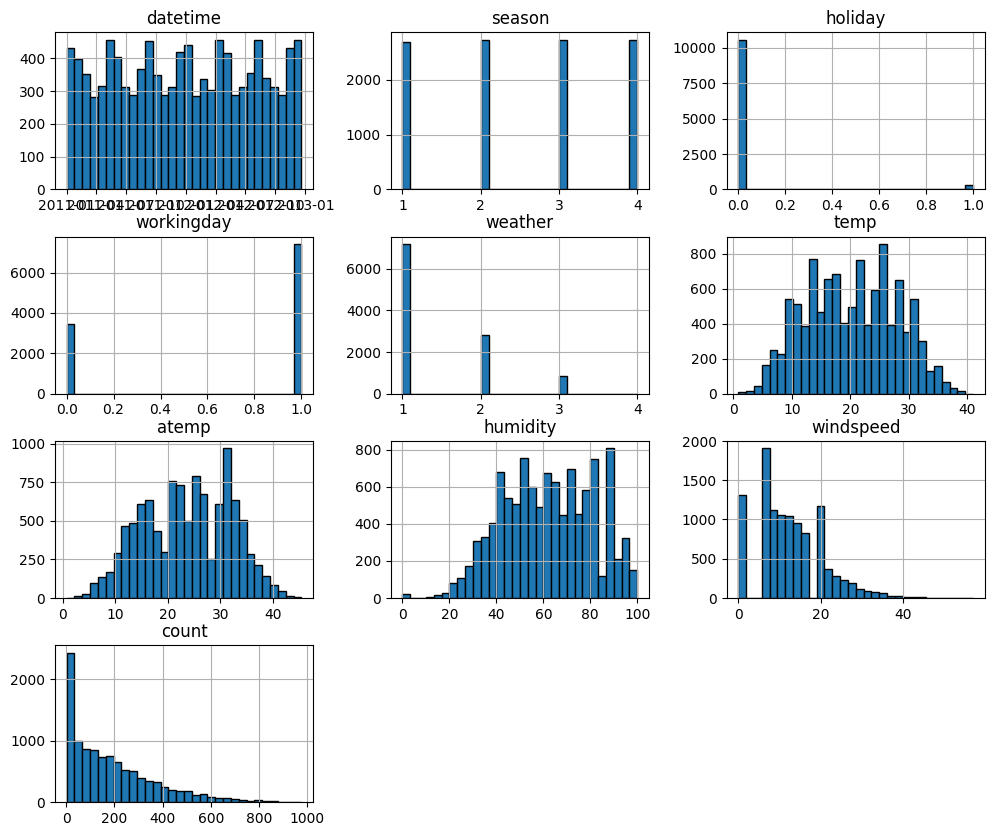

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12, 10), bins=30, edgecolor='black')


In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

def get_weather(atemp):
    if atemp < 10:
        return 'Cold'
    elif 10 <= atemp < 20:
        return 'Cool'
    elif 20 <= atemp < 30:
        return 'Warm'
    elif atemp >= 30:
        return 'Hot'
    else:
        return 'Unknown'  # In case of invalid input


train['weather'] = train['atemp'].apply(get_weather)
train['weather'] = train['weather'].astype('category')
test['weather'] = test['atemp'].apply(get_weather)
test['weather'] = test['weather'].astype('category')
train['season'] = train['datetime'].apply(get_season)
train["season"] = train["season"].astype('category')
test["season"] = test['datetime'].apply(get_season)
test["season"] = test["season"].astype('category')
train['day_of_week'] = train['datetime'].dt.dayofweek
test['day_of_week'] = test['datetime'].dt.dayofweek

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day_of_week
0,2011-01-01 00:00:00,Winter,0,0,Cool,9.84,14.395,81,0.0,16,0,5
1,2011-01-01 01:00:00,Winter,0,0,Cool,9.02,13.635,80,0.0,40,1,5
2,2011-01-01 02:00:00,Winter,0,0,Cool,9.02,13.635,80,0.0,32,2,5
3,2011-01-01 03:00:00,Winter,0,0,Cool,9.84,14.395,75,0.0,13,3,5
4,2011-01-01 04:00:00,Winter,0,0,Cool,9.84,14.395,75,0.0,1,4,5


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'day_of_week'}>, <Axes: >, <Axes: >]],
      dtype=object)

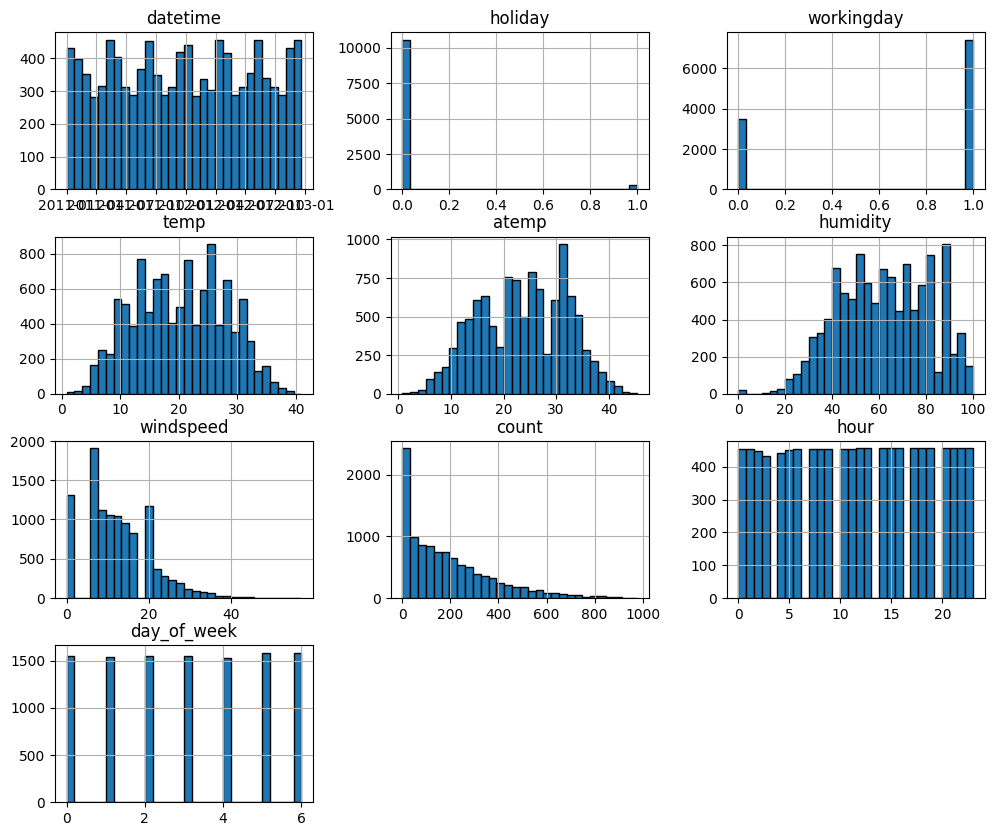

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(12, 10), bins=30, edgecolor='black')

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features2 = TabularPredictor(label="count", eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets="best_quality")


No path specified. Models will be saved in: "AutogluonModels/ag-20240919_194137"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.49 GB / 12.67 GB (82.8%)
Disk Space Avail:   62.01 GB / 107.72 GB (57.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

{'root_mean_squared_error': -19.476397051538957, 'mean_squared_error': -379.3300421091954, 'mean_absolute_error': -13.18691390338856, 'r2': 0.9884386898325895, 'pearsonr': 0.9950960740548287, 'median_absolute_error': -8.438425540924072}
*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -31.366154  root_mean_squared_error      67.959713  373.306901                0.004591           0.043475            3       True          9
1         LightGBM_BAG_L2  -31.462139  root_mean_squared_error      64.999748  288.377863                0.811282          38.235521            2       True          7
2       LightGBMXT_BAG_L2  -32.561460  root_mean_squared_error      66.244080  294.026102                2.055614          43.883760            2       True          6
3  RandomForestMSE_BAG_L2  -3

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


<Axes: xlabel='model'>

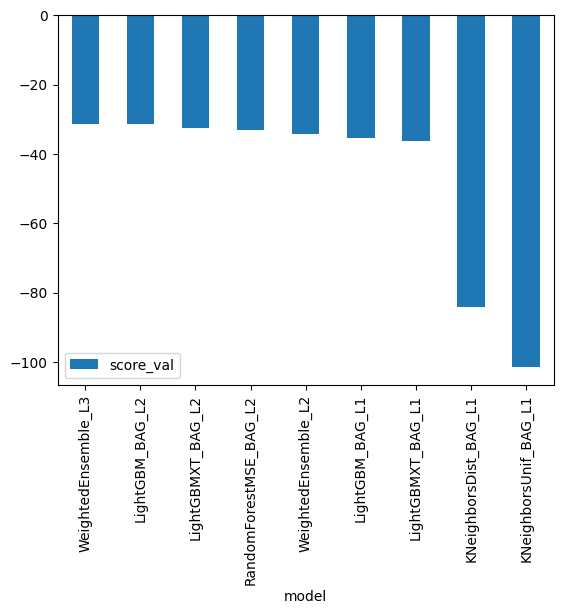

In [ ]:
performance_new_features2 = predictor_new_features2.evaluate(train)
print(performance_new_features2)

predictor_new_features2.fit_summary()
predictor_new_features2.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Remember to set all negative values to zero
predictions_new2 = predictor_new_features2.predict(test)
predictions_new2.head()
predictions_description_new2 = predictions_new2.describe()
print(predictions_description_new2)

num_negative_values_new2 = (predictions_new2 < 0).sum()
print(f"Number of negative values: {num_negative_values_new2}")

count    6493.000000
mean      147.626312
std       130.852676
min         2.053551
25%        48.401764
50%       115.637779
75%       202.952057
max       797.545349
Name: count, dtype: float64
Number of negative values: 0


In [ ]:
predictions_new2[predictions_new2 < 0] = 0

In [ ]:
# Same submitting predictions
submission["count"] = predictions_new2
print(submission["count"].head())
submission.to_csv("submission_new_features2.csv", index=False)

0    19.830393
1    15.760131
2    14.801182
3    11.409325
4     9.552790
Name: count, dtype: float32


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features2.csv -m "new features submission2"

100% 188k/188k [00:01<00:00, 169kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 12

fileName                      date                 description                          status    publicScore  privateScore  
----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features2.csv  2024-09-19 19:56:20  new features submission2             complete  0.75401      0.75401       
submission_new_hpo5.csv       2024-09-19 18:01:48  new features with hpo5               complete  0.61440      0.61440       
submission_new_hpo4.csv       2024-09-19 16:35:40  new features with hpo4               complete  0.51728      0.51728       
submission_new_hpo3.csv       2024-09-19 16:06:03  new features with hpo3               complete  0.56763      0.56763       
submission_new_hpo2.csv       2024-09-19 15:54:03  new features with hpo2               complete  0.56763      0.56763       
submission_new_hpo1.csv       2024-09-19 15:21:01  new features with hpo1               complete  0.58200      0.58200

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:

# hyperparameter_tune_kwargs = {
#     'num_trials': 20,              # Try 20 different configurations
#     'scheduler': 'local',          # Run on local machine
#     'searcher': 'random',          # Random search for hyperparameters
#     'max_t': 600                   # Max time for each trial is 600 seconds
# }


# Exclude poor-performing models and define hyperparameters for tuning
hyperparameters = {
    'GBM': [
        {
        'learning_rate': 0.05,   # Smaller learning rate for better generalization
        'num_leaves': 31,        # Maximum number of leaves per tree
        'feature_fraction': 0.8, # Random subset of features for each iteration
        'bagging_fraction': 0.8, # Random subset of data for each iteration
        'bagging_freq': 5,       # Bagging performed every 5 iterations
        'max_depth': 10,         # Depth of the trees (you can set to -1 for no limit)
        'num_boost_round': 1000, # Number of boosting rounds
        'early_stopping_rounds': 50  # Early stopping if performance doesn't improve
        }
    ],
    'RF': [
        {
            'n_estimators': 100,           # Number of trees in the forest
            'max_depth': 10,               # Maximum depth of each tree
            'min_samples_split': 5,        # Minimum number of samples required to split an internal node
            'min_samples_leaf': 2,         # Minimum number of samples required to be at a leaf node
            'max_features': 'sqrt',        # Number of features to consider when looking for the best split
            'bootstrap': True              # Whether bootstrap samples are used when building trees
        }
    ],
    'CAT': [
        {
            'learning_rate': 0.05,       # Smaller learning rate for more gradual training
            'depth': 6,                  # Depth of the trees
            'l2_leaf_reg': 3.0,          # Regularization to avoid overfitting
            'iterations': 1000,          # Number of boosting iterations
            'one_hot_max_size': 10,      # Maximum size of categorical features for one-hot encoding
            'eval_metric': 'RMSE',       # Root Mean Squared Error (for regression tasks)
            'od_type': 'Iter',           # Early stopping based on the number of iterations
            'od_wait': 100               # Wait for improvement in 100 iterations before stopping
        }
    ],
}


excluded_model_types = ['KNN']
time_limit = 600

# 1. only exclude models            hpo1
# 2. exclude models +  hyperparams  hpo2
# 3. increase time to 1000 sec      hpo3

predictor_new_hpo1 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train,
    time_limit=time_limit,
    presets='best_quality',
    excluded_model_types=excluded_model_types,  # Exclude KNN
)



No path specified. Models will be saved in: "AutogluonModels/ag-20240919_150116"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   63.84 GB / 107.72 GB (59.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

{'root_mean_squared_error': -14.477321139849748, 'mean_squared_error': -209.59282738634042, 'mean_absolute_error': -9.298878595353422, 'r2': 0.9936119805518054, 'pearsonr': 0.9968422792192773, 'median_absolute_error': -5.884659767150879}
*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -34.182172  root_mean_squared_error      77.180456  330.845855                0.001240           0.074516            3       True          7
1     WeightedEnsemble_L2 -34.355720  root_mean_squared_error      76.247625  259.242725                0.000870           0.021724            2       True          3
2         LightGBM_BAG_L2 -34.708988  root_mean_squared_error      76.407416  294.626449                0.160661          35.405448            2       True          5
3         LightGBM_BAG_L1 -35.30

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


<Axes: xlabel='model'>

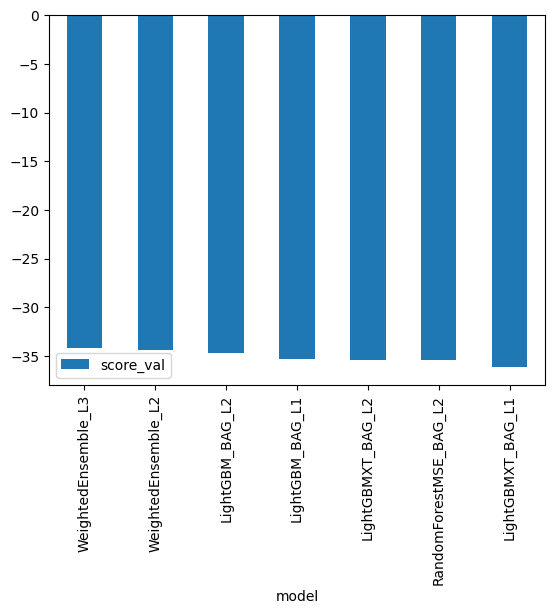

In [ ]:
performance_new_hpo1 = predictor_new_hpo1.evaluate(train)
print(performance_new_hpo1)
predictor_new_hpo1.fit_summary()
predictor_new_hpo1.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1.head()
predictions_description_new_hpo1 = predictions_new_hpo1.describe()
print(predictions_description_new_hpo1)
num_negative_values = (predictions_new_hpo1 < 0).sum()
print(f"Number of negative values: {num_negative_values}")
predictions_new_hpo1[predictions_new_hpo1 < 0] = 0

count    6493.000000
mean      190.406830
std       173.555099
min       -25.502981
25%        47.715908
50%       148.126572
75%       282.608582
max       886.808838
Name: count, dtype: float64
Number of negative values: 103


In [ ]:
# Same submitting predictions
submission["count"] = predictions_new_hpo1
print(submission["count"].head())
submission.to_csv("submission_new_hpo1.csv", index=False)

0    17.823381
1     5.715229
2     4.324823
3     4.441064
4     4.176526
Name: count, dtype: float32


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hpo1"

100% 188k/188k [00:00<00:00, 306kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10


fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2024-09-19 15:21:01  new features with hpo1               complete  0.58200      0.58200       
submission_new_features.csv  2024-09-19 14:57:42  new features submission1             complete  0.68507      0.68507       
submission.csv               2024-09-19 14:29:24  original data submission1            complete  1.84061      1.84061       
submission_new_hpo.csv       2024-09-18 23:05:44  new features with hyperparameters-2  complete  0.48480      0.48480       
submission_new_hpo.csv       2024-09-18 22:46:12  new features with hyperparameters    complete  0.59355      0.59355       
submission_new_hpo.csv       2024-09-18 22:06:45  new features with hyperparameters    complete  0.49050      0.49050       


In [ ]:
# 2. exclude +  hyperparams hpo2
predictor_new_hpo2 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train,
    time_limit=time_limit,  # Adjust time limit as needed
    presets='best_quality',
    hyperparameters=hyperparameters,
    excluded_model_types=excluded_model_types,
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240919_152215"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.12 GB / 12.67 GB (79.9%)
Disk Space Avail:   63.34 GB / 107.72 GB (58.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

{'root_mean_squared_error': -22.379799921419355, 'mean_squared_error': -500.85544452276184, 'mean_absolute_error': -14.42168436583933, 'r2': 0.984734810058896, 'pearsonr': 0.9923814957166213, 'median_absolute_error': -9.213592529296875}
*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -35.481964  root_mean_squared_error       3.591426  128.185781                0.000952           0.032019            3       True          8
1  WeightedEnsemble_L2 -35.579192  root_mean_squared_error       2.966970   91.557700                0.001032           0.030717            2       True          4
2      LightGBM_BAG_L1 -35.731527  root_mean_squared_error       2.838163   42.858309                2.838163          42.858309            1       True          1
3      CatBoost_BAG_L2 -35.942125  root_mean_

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


<Axes: xlabel='model'>

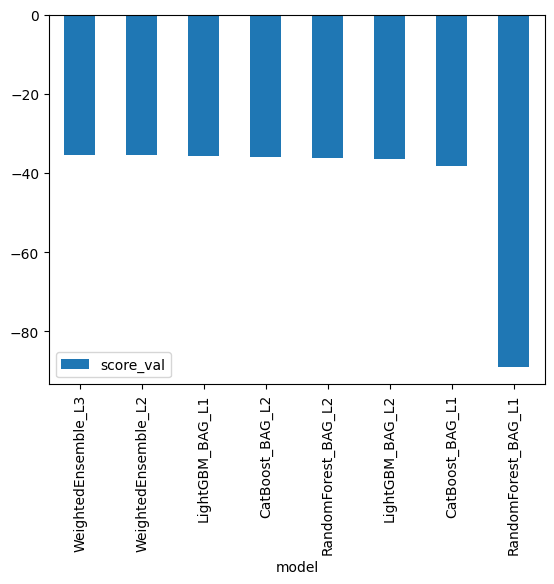

In [ ]:
performance_new_hpo2 = predictor_new_hpo2.evaluate(train)
print(performance_new_hpo2)
predictor_new_hpo2.fit_summary()
predictor_new_hpo2.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()
predictions_description_new_hpo2 = predictions_new_hpo2.describe()
print(predictions_description_new_hpo2)
num_negative_values = (predictions_new_hpo2 < 0).sum()
print(f"Number of negative values: {num_negative_values}")
predictions_new_hpo2[predictions_new_hpo2 < 0] = 0


count    6493.000000
mean      190.372559
std       173.766769
min       -23.048771
25%        47.012825
50%       147.574249
75%       285.164734
max       890.309570
Name: count, dtype: float64
Number of negative values: 96


In [ ]:
submission["count"] = predictions_new_hpo2
print(submission["count"].head())
submission.to_csv("submission_new_hpo2.csv", index=False)


0    13.463066
1     2.278706
2     0.458701
3     2.398850
4     2.369717
Name: count, dtype: float32


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hpo2"


100% 188k/188k [00:00<00:00, 296kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2024-09-19 15:54:03  new features with hpo2               complete  0.56763      0.56763       
submission_new_hpo1.csv      2024-09-19 15:21:01  new features with hpo1               complete  0.58200      0.58200       
submission_new_features.csv  2024-09-19 14:57:42  new features submission1             complete  0.68507      0.68507       
submission.csv               2024-09-19 14:29:24  original data submission1            complete  1.84061      1.84061       
submission_new_hpo.csv       2024-09-18 23:05:44  new features with hyperparameters-2  complete  0.48480      0.48480       
submission_new_hpo.csv       2024-09-18 22:46:12  new features with hyperparameters    complete  0.59355      0.59355       


In [ ]:
time_limit = 1000
##############################
# 3. only time limit hpo3
predictor_new_hpo3 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train,
    time_limit=time_limit,  # Adjust time limit as needed
    presets='best_quality',
    hyperparameters=hyperparameters,
    excluded_model_types=excluded_model_types,
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240919_155654"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.18 GB / 12.67 GB (80.4%)
Disk Space Avail:   63.29 GB / 107.72 GB (58.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

{'root_mean_squared_error': -22.379799938813722, 'mean_squared_error': -500.8554453013267, 'mean_absolute_error': -14.421684406597825, 'r2': 0.9847348100351666, 'pearsonr': 0.9923814956917393, 'median_absolute_error': -9.213584899902344}
*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -35.481964  root_mean_squared_error       5.948557  152.741427                0.001060           0.038678            3       True          8
1  WeightedEnsemble_L2 -35.579192  root_mean_squared_error       5.243127  108.105030                0.001039           0.030492            2       True          4
2      LightGBM_BAG_L1 -35.731527  root_mean_squared_error       5.068578   50.760226                5.068578          50.760226            1       True          1
3      CatBoost_BAG_L2 -35.942125  root_mean

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


count    6493.000000
mean      190.372559
std       173.766769
min       -23.048771
25%        47.012825
50%       147.574249
75%       285.164703
max       890.309570
Name: count, dtype: float64
Number of negative values: 96
0    13.463066
1     2.278706
2     0.458701
3     2.398850
4     2.369717
Name: count, dtype: float32
100% 188k/188k [00:00<00:00, 289kB/s]
Successfully submitted to Bike Sharing DemandfileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo3.csv      2024-09-19 16:06:03  new features with hpo3               complete  0.56763      0.56763       
submission_new_hpo2.csv      2024-09-19 15:54:03  new features with hpo2               complete  0.56763      0.56763       
submission_new_hpo1.csv      2024-09-19 15:21:01  new features with hpo1               c

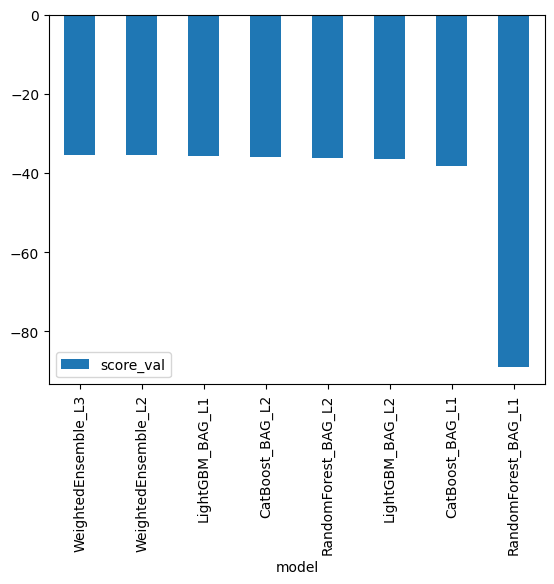

In [ ]:
performance_new_hpo3 = predictor_new_hpo3.evaluate(train)
print(performance_new_hpo3)
predictor_new_hpo3.fit_summary()
predictor_new_hpo3.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


predictions_new_hpo3 = predictor_new_hpo3.predict(test)
predictions_new_hpo3.head()
predictions_description_new_hpo3 = predictions_new_hpo3.describe()
print(predictions_description_new_hpo3)
num_negative_values = (predictions_new_hpo3 < 0).sum()
print(f"Number of negative values: {num_negative_values}")
predictions_new_hpo3[predictions_new_hpo3 < 0] = 0


submission["count"] = predictions_new_hpo3
print(submission["count"].head())
submission.to_csv("submission_new_hpo3.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo3.csv -m "new features with hpo3"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10


#### New Score of `?`

In [ ]:
time_limit = 600
hyperparameters = {
    'GBM': [
        {
        'learning_rate': 0.01,  # Lower learning rate for more gradual updates
        'num_boost_round': 1500,  # More boosting rounds
        'num_leaves': 40,  # Increase leaves for more complex trees
        'feature_fraction': 0.8,  # Try lowering feature fraction for better generalization
        'bagging_fraction': 0.7,  # Decrease to reduce overfitting
        'bagging_freq': 5,  # Bagging every 5 iterations
        'max_depth': 15,  # Allow deeper trees
        'early_stopping_rounds': 100  # Early stop if no improvement
        }
    ],
    'CAT': [
        {
            'iterations': 1200,  # Increase iterations
            'depth': 8,  # Adjust depth
            'learning_rate': 0.03,  # Slightly lower learning rate
            'l2_leaf_reg': 4.0,  # Increase regularization to avoid overfitting
            'one_hot_max_size': 10,  # Categorical features with more categories use one-hot encoding
            'eval_metric': 'RMSE',  # Ensure you're optimizing for RMSE
            'od_type': 'Iter',  # Use iterative early stopping
            'od_wait': 50  # Early stopping after 50 iterations without improvement
            }
        ],
}

hyperparameter_tune_kwargs = {
    'num_trials': 20,              # Try 20 different configurations
    'scheduler': 'local',          # Run on local machine
    'searcher': 'random',          # Random search for hyperparameters
    'max_t': 600                   # Max time for each trial is 600 seconds
}
excluded_model_types = ['RandomForest', 'KNN']

##############################
# 4. hyperparams,hyperparameter_tune_kwargs, modelexclude  hpo4
predictor_new_hpo4 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train,
    time_limit=time_limit,  # Adjust time limit as needed
    presets='best_quality',
    hyperparameters=hyperparameters,
    excluded_model_types=excluded_model_types,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)



No path specified. Models will be saved in: "AutogluonModels/ag-20240919_162419"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.63 GB / 12.67 GB (83.9%)
Disk Space Avail:   63.13 GB / 107.72 GB (58.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-37.0566	 = Validation score   (-root_mean_squared_error)
	78.38s	 = Training   runtime
	7.21s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 129.31s of the 352.61s of remaining time.
	No hyperparameter search space specified for CatBoost_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.26%)
Fitted model: CatBoost_BAG_L1 ...
	-36.8288	 = Validation score   (-root_mean_squared_error)
	72.0s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 280.54s of remaining time.
	Ensemble Weights: {'CatBoost_BAG

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-36.7382	 = Validation score   (-root_mean_squared_error)
	64.49s	 = Training   runtime
	0.88s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-36.6001	 = Validation score   (-root_mean_squared_error)
	61.57s	 = Training   runtime
	1.49s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 126.22s of the 154.25s of remaining time.
	No hyperparameter search space specified for CatBoost_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.29%)
F

{'root_mean_squared_error': -26.451148962962055, 'mean_squared_error': -699.6632814608085, 'mean_absolute_error': -16.82516566976212, 'r2': 0.9786754980840984, 'pearsonr': 0.9893617345542215, 'median_absolute_error': -10.523994445800781}
*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -36.159395  root_mean_squared_error       9.004457  249.571208                0.002559           0.051813            3       True          7
1  WeightedEnsemble_L2 -36.290011  root_mean_squared_error       7.397759  150.402372                0.001327           0.022041            2       True          3
2      CatBoost_BAG_L2 -36.439848  root_mean_squared_error       7.509053  187.953966                0.112620          37.573636            2       True          6
3   LightGBM_BAG_L2/T2 -36.600079  root_mean

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


count    6493.000000
mean      190.309570
std       172.785767
min       -10.918406
25%        47.419312
50%       148.868439
75%       284.332977
max       876.426147
Name: count, dtype: float64
Number of negative values: 32
0    13.938789
1     4.093366
2     1.929388
3     2.782651
4     2.931469
Name: count, dtype: float32
100% 188k/188k [00:01<00:00, 177kB/s]
Successfully submitted to Bike Sharing DemandfileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo4.csv      2024-09-19 16:35:40  new features with hpo4               complete  0.51728      0.51728       
submission_new_hpo3.csv      2024-09-19 16:06:03  new features with hpo3               complete  0.56763      0.56763       
submission_new_hpo2.csv      2024-09-19 15:54:03  new features with hpo2               c

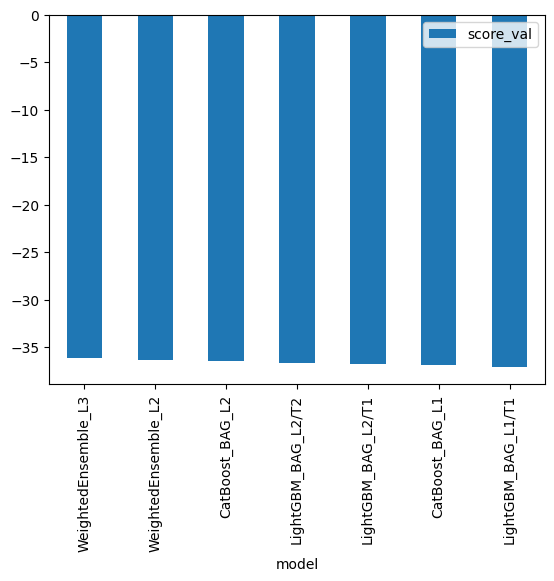

In [ ]:
performance_new_hpo4 = predictor_new_hpo4.evaluate(train)
print(performance_new_hpo4)
predictor_new_hpo4.fit_summary()
predictor_new_hpo4.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


predictions_new_hpo4 = predictor_new_hpo4.predict(test)
predictions_new_hpo4.head()
predictions_description_new_hpo4 = predictions_new_hpo4.describe()
print(predictions_description_new_hpo4)
num_negative_values = (predictions_new_hpo4 < 0).sum()
print(f"Number of negative values: {num_negative_values}")
predictions_new_hpo4[predictions_new_hpo4 < 0] = 0


submission["count"] = predictions_new_hpo4
print(submission["count"].head())
submission.to_csv("submission_new_hpo4.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo4.csv -m "new features with hpo4"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10


In [ ]:
hyperparameters = {
    'GBM': [
        {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
        {'learning_rate': 0.05, 'num_leaves': 31, 'feature_fraction': 0.8}
    ],
    'CAT': [
        {'depth': 6, 'l2_leaf_reg': 3.0},
        {'depth': 8, 'grow_policy': 'Depthwise'}
    ],
    'XGB': [
        {'max_depth': 6, 'learning_rate': 0.1},
        {'max_depth': 10, 'learning_rate': 0.05}
    ],
    'NN_TORCH': [
        {'num_layers': 3, 'hidden_size': 128, 'dropout_prob': 0.1, 'learning_rate': 0.001}
    ]
}

predictor_new_hpo5 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train,
    time_limit=time_limit,  # Adjust time limit as needed
    presets='best_quality',
    hyperparameters=hyperparameters,
    excluded_model_types=excluded_model_types,
)



No path specified. Models will be saved in: "AutogluonModels/ag-20240919_173603"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.10 GB / 12.67 GB (79.7%)
Disk Space Avail:   63.03 GB / 107.72 GB (58.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

{'root_mean_squared_error': -14.601223582489723, 'mean_squared_error': -213.195730105854, 'mean_absolute_error': -9.455087477694796, 'r2': 0.9935021704360243, 'pearsonr': 0.9967849400234612, 'median_absolute_error': -6.061714172363281}
*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -34.264396  root_mean_squared_error      96.341338  316.801059                0.001557           0.038853            3       True          6
1  WeightedEnsemble_L2 -34.350652  root_mean_squared_error      96.072733  276.197695                0.001138           0.026881            2       True          3
2      LightGBM_BAG_L2 -34.922211  root_mean_squared_error      96.339780  316.762206                0.268186          40.591392            2       True          5
3      LightGBM_BAG_L1 -35.104548  root_mean_s

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


count    6493.000000
mean      190.193268
std       173.355576
min       -34.301201
25%        48.061779
50%       147.612396
75%       283.574432
max       880.251160
Name: count, dtype: float64
Number of negative values: 142
0    19.087494
1     5.052511
2     3.375005
3     3.322581
4     3.186225
Name: count, dtype: float32
100% 187k/187k [00:00<00:00, 285kB/s]
Successfully submitted to Bike Sharing DemandfileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo5.csv      2024-09-19 18:01:48  new features with hpo5               complete  0.61440      0.61440       
submission_new_hpo4.csv      2024-09-19 16:35:40  new features with hpo4               complete  0.51728      0.51728       
submission_new_hpo3.csv      2024-09-19 16:06:03  new features with hpo3               

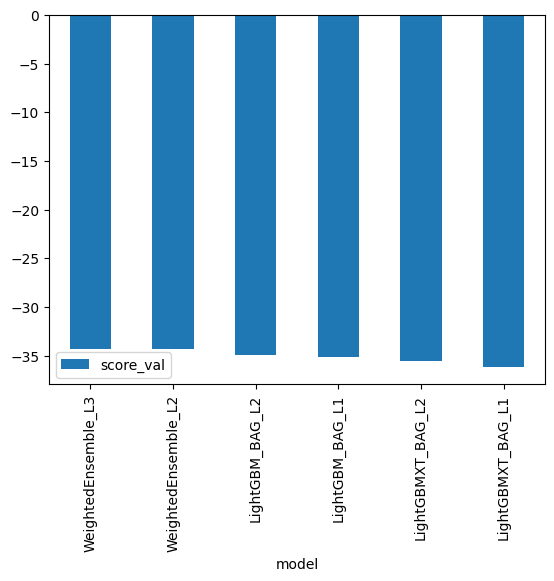

In [ ]:
performance_new_hpo5 = predictor_new_hpo5.evaluate(train)
print(performance_new_hpo5)
predictor_new_hpo5.fit_summary()
predictor_new_hpo5.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


predictions_new_hpo5 = predictor_new_hpo5.predict(test)
predictions_new_hpo5.head()
predictions_description_new_hpo5 = predictions_new_hpo5.describe()
print(predictions_description_new_hpo5)
num_negative_values = (predictions_new_hpo5 < 0).sum()
print(f"Number of negative values: {num_negative_values}")
predictions_new_hpo5[predictions_new_hpo5 < 0] = 0


submission["count"] = predictions_new_hpo5
print(submission["count"].head())
submission.to_csv("submission_new_hpo5.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo5.csv -m "new features with hpo5"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10


In [ ]:
hyperparameter_tune_kwargs = {
    'num_trials': 20,              # Try 20 different configurations
    'scheduler': 'local',          # Run on local machine
    'searcher': 'random',          # Random search for hyperparameters
    'max_t': 600                   # Max time for each trial is 600 seconds
}


# Exclude poor-performing models and define hyperparameters for tuning
hyperparameters = {
    'GBM': [
        {'num_leaves': 31, 'learning_rate': 0.05, 'num_boost_round': 100},  # LightGBM_BAG_L1
        {'num_leaves': 64, 'learning_rate': 0.03, 'num_boost_round': 200, 'extra_trees': True},  # LightGBMXT_BAG_L2
    ],
    'RF': [
        {'n_estimators': 200, 'max_depth': 20},  # RandomForestMSE_BAG_L2
    ],
    'CAT': [
        {'depth': 6, 'learning_rate': 0.1},  # CatBoost_BAG_L1 - optional exclusion
    ],
}

excluded_model_types = ['KNN', 'CAT']

predictor_new_hpo6 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train,
    time_limit=2100,  # Adjust time limit as needed
    presets='best_quality',
    num_bag_folds=5,  # Enables bagging
    num_stack_levels=2,  # Adds stacking
    hyperparameters=hyperparameters,  # Apply the tuned hyperparameters
    excluded_model_types=excluded_model_types,  # Exclude KNN and optionally CatBoost
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs  # Apply hyperparameter tuning
)



No path specified. Models will be saved in: "AutogluonModels/ag-20240919_210933"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.11 GB / 12.67 GB (79.8%)
Disk Space Avail:   60.98 GB / 107.72 GB (56.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFol

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFol

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFol

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFol

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFol

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.21%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.21%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.21%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.21%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.21%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.21%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.21%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_2_BAG_L

{'root_mean_squared_error': -24.041199476088977, 'mean_squared_error': -577.9792722491009, 'mean_absolute_error': -14.247361613528904, 'r2': 0.9823842119130589, 'pearsonr': 0.9911885394990609, 'median_absolute_error': -8.008387565612793}
*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val              eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L4 -38.866315  root_mean_squared_error      17.834112   964.424213                0.009089           0.144386            4       True         57
1    WeightedEnsemble_L3 -38.923886  root_mean_squared_error      11.480837   558.288430                0.001498           0.049719            3       True         39
2   LightGBM_2_BAG_L2/T3 -39.516641  root_mean_squared_error      10.252568   441.607559                0.401053          26.774651            2       True         31
3   LightGBM_2_BAG_L2/T4 -39.630

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


count    6493.000000
mean      193.139328
std       174.147583
min         2.781564
25%        49.317539
50%       151.653000
75%       288.005157
max       872.455566
Name: count, dtype: float64
Number of negative values: 0
0    12.094127
1     5.861425
2     3.857027
3     3.288101
4     3.428241
Name: count, dtype: float32
100% 188k/188k [00:00<00:00, 316kB/s]
Successfully submitted to Bike Sharing DemandfileName                      date                 description                          status    publicScore  privateScore  
----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo6.csv       2024-09-19 22:10:50  new features with hpo6               complete  0.48414      0.48414       
submission_new_hpo6.csv       2024-09-19 20:48:25  new features with hpo6               complete  0.48480      0.48480       
submission_new_features2.csv  2024-09-19 19:56:20  new features submission2          

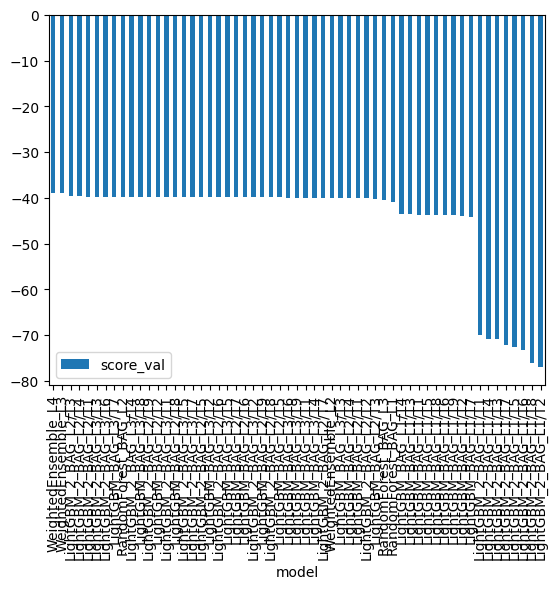

In [77]:
performance_new_hpo6 = predictor_new_hpo6.evaluate(train)
print(performance_new_hpo6)
predictor_new_hpo6.fit_summary()
predictor_new_hpo6.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


predictions_new_hpo6 = predictor_new_hpo6.predict(test)
predictions_new_hpo6.head()
predictions_description_new_hpo6 = predictions_new_hpo6.describe()
print(predictions_description_new_hpo6)
num_negative_values = (predictions_new_hpo6 < 0).sum()
print(f"Number of negative values: {num_negative_values}")
predictions_new_hpo6[predictions_new_hpo6 < 0] = 0


submission["count"] = predictions_new_hpo6
print(submission["count"].head())
submission.to_csv("submission_new_hpo6.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo6.csv -m "new features with hpo6"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 11

fileName                      date                 description                          status    publicScore  privateScore  
----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo6.csv       2024-09-19 20:48:25  new features with hpo6               complete  0.48480      0.48480       
submission_new_features2.csv  2024-09-19 19:56:20  new features submission2             complete  0.75401      0.75401       
submission_new_hpo5.csv       2024-09-19 18:01:48  new features with hpo5               complete  0.61440      0.61440       
submission_new_hpo4.csv       2024-09-19 16:35:40  new features with hpo4               complete  0.51728      0.51728       
submission_new_hpo3.csv       2024-09-19 16:06:03  new features with hpo3               complete  0.56763      0.56763       
submission_new_hpo2.csv       2024-09-19 15:54:03  new features with hpo2               complete  0.56763      0.56763

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

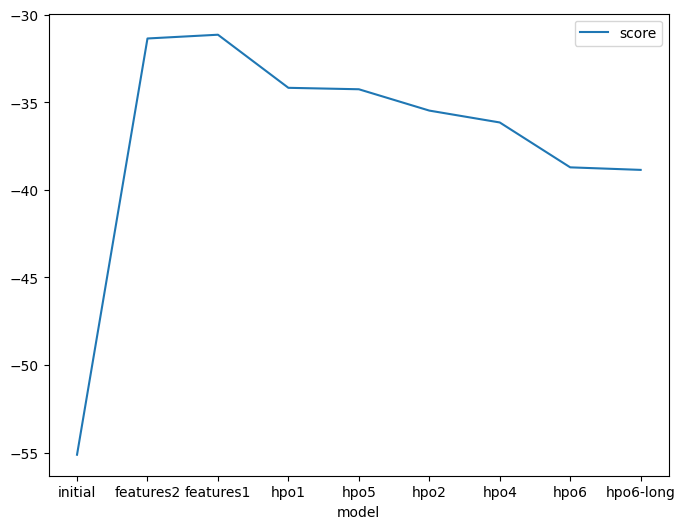

In [81]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial","features2", "features1", "hpo1", "hpo5", "hpo2","hpo4", "hpo6", "hpo6-long"],
        "score": [-55.123669, -31.366154, -31.151678, -34.182172, -34.264396, -35.481964, -36.159395, -38.721307, -38.866315 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

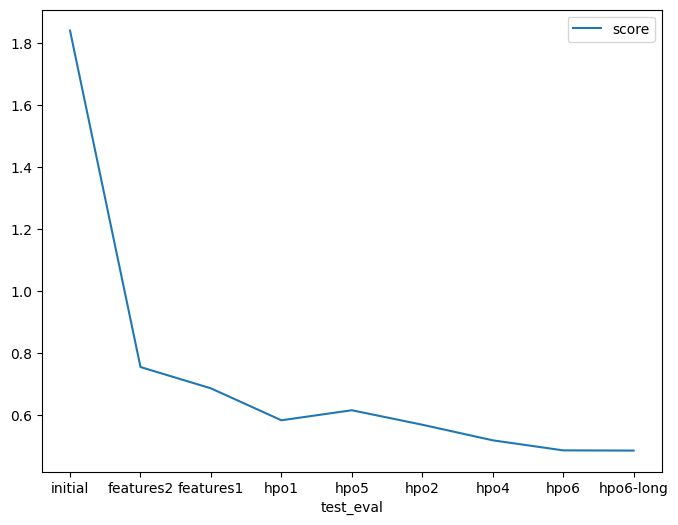

In [84]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "features2", "features1", "hpo1", "hpo5", "hpo2", "hpo4", "hpo6", "hpo6-long"],
        "score": [1.84061,  0.75401 , 0.68507 , 0.58200 , 0.6144, 0.56763 , 0.51728, 0.4848,  0.48414]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

<!--
                models used in AutoGluon	features	                                            hyperparameter_tune_kwargs	score
________________________________________________________________________________________________________________
original	    AutoGluon standard	        no new features
new_feature2	AutoGluon standard	        season, hour of the day, day of the week		                                    0.75401
new_feature1	AutoGluon standard	        weather, season, hour of the day, day of the week		                            0.68507
hpo1	        exclude KNN from standard	weather, season, hour of the day, day of the week		                            0.582
hpo5	        GBM,CAT,XGB,NN_TORCH	    weather, season, hour of the day, day of the week		                            0.6144
hpo2	        GBM, RF, CAT	            weather, season, hour of the day, day of the week		                            0.56763
hpo4	        GBM, CAT	                weather, season, hour of the day, day of the week	                            yes	0.51728
hpo6	        GBM, RF, CAT	            weather, season, hour of the day, day of the week	                            yes	0.4848
hpo6-log        GBM, RF, CAT	            weather, season, hour of the day, day of the week	                            yes	0.48414

	hyperparameter_tune_kwargs = {
	'num_trials': 20, # Try 20 different configurations
	'scheduler': 'local', # Run on local machine
	'searcher': 'random', # Random search for hyperparameters
	'max_t': 600 # Max time for each trial is 600 seconds
	}
    
    There were slight variations in hyperparameters per model (values used are seen in the source code), no dramatic change
    all experiments  ran 600 seconds,  hpo6-long ran 2100 seconds -->




In [94]:

data = {
    "models_used_in_AutoGluon": [
        "original",
        "new_feature2",
        "new_feature1",
        "hpo1",
        "hpo5",
        "hpo2",
        "hpo4",
        "hpo6",
        "hpo6-log"
    ],
    "features": [
        "AutoGluon standard",
        "season, HOD, DOW",
        "weather, season, HOD, DOW",
        "weather, season, HOD, DOW",
        "weather, season, HOD, DOW",
        "weather, season, HOD, DOW",
        "weather, season, HOD, DOW",
        "weather, season, HOD, DOW",
        "weather, season, HOD, DOW"
    ],
    "kwargs": [
        "no",
        "no",
        "no",
        "no",
        "no",
        "no",
        "no",
        "yes",
        "yes"
    ],
    "score": [
        1.84061,
        0.75401,
        0.68507,
        0.582,
        0.6144,
        0.56763,
        0.51728,
        0.4848,
        0.48414
    ]
}

df = pd.DataFrame(data)
print(df)

	# hyperparameter_tune_kwargs = {
	# 'num_trials': 20, # Try 20 different configurations
	# 'scheduler': 'local', # Run on local machine
	# 'searcher': 'random', # Random search for hyperparameters
	# 'max_t': 600 # Max time for each trial is 600 seconds
	# }

  #   There were slight variations in hyperparameters per model (values used are seen in the source code), no dramatic change
  #   all experiments  ran 600 seconds,  hpo6-long ran 2100 seconds

  # HOD = Hour of the day
  # DOW = Day of the week


  models_used_in_AutoGluon                   features kwargs    score
0                 original         AutoGluon standard     no  1.84061
1             new_feature2           season, HOD, DOW     no  0.75401
2             new_feature1  weather, season, HOD, DOW     no  0.68507
3                     hpo1  weather, season, HOD, DOW     no  0.58200
4                     hpo5  weather, season, HOD, DOW     no  0.61440
5                     hpo2  weather, season, HOD, DOW     no  0.56763
6                     hpo4  weather, season, HOD, DOW     no  0.51728
7                     hpo6  weather, season, HOD, DOW    yes  0.48480
8                 hpo6-log  weather, season, HOD, DOW    yes  0.48414
